In [17]:
## Import Packages

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import seaborn as sns
%matplotlib inline
import  statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy.stats import boxcox

In [19]:
## Import Data

In [69]:
ExerciseRoutine = pd.read_csv('~renoodle/Downloads/ExerciseRoutine-2.csv')

In [70]:
ExerciseRoutine

,Weekly_Exercise_Routine,SleepInHours,Breakfast,Pre_Workout,Arms,Chest,Shoulders,Abdomen,Butt,Thighs,Calves,Completed
0,Sunday,6,Yes,No,12,15,17,15,18,16,15,Yes
1,Monday,5,No,Yes,25,23,28,27,23,20,21,Yes
2,Tuesaday,8,Yes,Yes,15,18,12,12,16,18,18,Yes
3,Wednesday,4,Yes,No,10,13,17,14,19,23,27,Yes
4,Thursday,5,No,Yes,30,25,28,24,26,27,19,Yes
5,Friday,6,Yes,Yes,18,15,18,16,15,13,15,Yes
6,Saturday,5,Yes,No,7,9,8,7,10,7,12,Yes


In [71]:
## Changing Breakfast, Pre_Workout and Completed to integers

In [72]:
def Breakfast (series):
    if series == "No":
        return 0
    if series == "Yes":
        return 1

In [73]:
ExerciseRoutine['Breakfast1'] = ExerciseRoutine['Breakfast'].apply(Breakfast)

In [74]:
def Pre_Workout (series):
    if series == "No":
        return 0
    if series == "Yes":
        return 1

In [75]:
ExerciseRoutine['Pre_Workout1'] = ExerciseRoutine['Pre_Workout'].apply(Pre_Workout)

In [76]:
def Completed (series):
    if series == "No":
        return 0
    if series == "Yes":
        return 1

In [77]:
ExerciseRoutine['Completed1'] = ExerciseRoutine['Completed'].apply(Completed)

In [78]:
ExerciseRoutine

,Weekly_Exercise_Routine,SleepInHours,Breakfast,Pre_Workout,Arms,Chest,Shoulders,Abdomen,Butt,Thighs,Calves,Completed,Breakfast1,Pre_Workout1,Completed1
0,Sunday,6,Yes,No,12,15,17,15,18,16,15,Yes,1,0,1
1,Monday,5,No,Yes,25,23,28,27,23,20,21,Yes,0,1,1
2,Tuesaday,8,Yes,Yes,15,18,12,12,16,18,18,Yes,1,1,1
3,Wednesday,4,Yes,No,10,13,17,14,19,23,27,Yes,1,0,1
4,Thursday,5,No,Yes,30,25,28,24,26,27,19,Yes,0,1,1
5,Friday,6,Yes,Yes,18,15,18,16,15,13,15,Yes,1,1,1
6,Saturday,5,Yes,No,7,9,8,7,10,7,12,Yes,1,0,1


In [89]:
ExerciseRoutine.to_csv('ExerciseRoutine.csv,index=TRUE')

In [90]:
## Dropping columns

In [91]:
ER1 = ExerciseRoutine[['Weekly_Exercise_Routine', 'SleepInHours', 'Breakfast1', 'Pre_Workout1', 'Completed1', 'Arms', 'Chest', 'Shoulders','Abdomen', 'Butt', 'Thighs', 'Calves']]

In [92]:
ER1

,Weekly_Exercise_Routine,SleepInHours,Breakfast1,Pre_Workout1,Completed1,Arms,Chest,Shoulders,Abdomen,Butt,Thighs,Calves
0,Sunday,6,1,0,1,12,15,17,15,18,16,15
1,Monday,5,0,1,1,25,23,28,27,23,20,21
2,Tuesaday,8,1,1,1,15,18,12,12,16,18,18
3,Wednesday,4,1,0,1,10,13,17,14,19,23,27
4,Thursday,5,0,1,1,30,25,28,24,26,27,19
5,Friday,6,1,1,1,18,15,18,16,15,13,15
6,Saturday,5,1,0,1,7,9,8,7,10,7,12


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SleepInHours', ylabel='Density'>

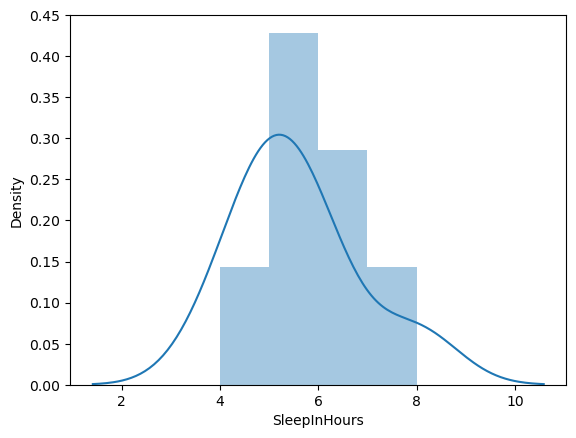

In [93]:
sns.distplot(ER1['SleepInHours'])

In [58]:
# Testing for Homoscedasticity

In [96]:
x = ER1['Breakfast1']
y = ER1['SleepInHours']

In [97]:
model = sm.OLS(y,x).fit()

In [98]:
print(model)

In [100]:
pred_val = model.fittedvalues.copy()
true_val = ER1['Breakfast1'].values.copy()
residual = true_val - pred_val

In [101]:
pred_val = model.fittedvalues.copy()
true_val = ER1['SleepInHours'].values.copy()
residual = true_val - pred_val

In [102]:
sms.diagnostic.het_breuschpagan(residual, ER1[['Breakfast1']])

(0.08441404741438385, nan, 0.07323808683151989, 0.7957477940624994)

In [103]:
sms.diagnostic.het_breuschpagan(residual, ER1[['SleepInHours']])

(2.238813003330073, nan, 2.821329645186311, 0.14402167430970783)

In [104]:
sms.linear_harvey_collier(model)

Ttest_1sampResult(statistic=0.25711795259639275, pvalue=0.8137140518684884)

In [108]:
ER1.corr()

,SleepInHours,Breakfast1,Pre_Workout1,Completed1,Arms,Chest,Shoulders,Abdomen,Butt,Thighs,Calves
SleepInHours,1.000000,0.306786,0.420084,NaN,-0.029376,0.083382,-0.334357,-0.241335,-0.262576,-0.216272,-0.415100
Breakfast1,0.306786,1.000000,-0.547723,NaN,-0.889776,-0.869730,-0.884910,-0.898026,-0.823509,-0.601073,-0.258199
Pre_Workout1,0.420084,-0.547723,1.000000,NaN,0.796113,0.754253,0.534579,0.600312,0.439229,0.338705,0.027196
Completed1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arms,-0.029376,-0.889776,0.796113,NaN,1.000000,0.953237,0.897947,0.903750,0.833116,0.650215,0.189596
Chest,0.083382,-0.869730,0.754253,NaN,0.953237,1.000000,0.872627,0.897273,0.890862,0.748659,0.303160
Shoulders,-0.334357,-0.884910,0.534579,NaN,0.897947,0.872627,1.000000,0.985978,0.930180,0.735363,0.423882
Abdomen,-0.241335,-0.898026,0.600312,NaN,0.903750,0.897273,0.985978,1.000000,0.900289,0.682660,0.391130
Butt,-0.262576,-0.823509,0.439229,NaN,0.833116,0.890862,0.930180,0.900289,1.000000,0.914587,0.571544
Thighs,-0.216272,-0.601073,0.338705,NaN,0.650215,0.748659,0.735363,0.682660,0.914587,1.000000,0.759769
